In [328]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/water-quality-and-potability")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [487]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
sns.set()

In [330]:
os.listdir('/kaggle/input/')

['water_potability.csv']

In [331]:
df = pd.read_csv('/kaggle/input/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [332]:
df.shape

(3276, 10)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [334]:
df.apply(pd.isnull).sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [335]:
df.duplicated().sum()

0

In [336]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [337]:
df_copy = df.copy()

In [338]:
#imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [339]:
null_columns = ['ph', 'Sulfate', 'Trihalomethanes']

In [340]:
#df[null_columns] = imputer.fit_transform(df[null_columns].values)

In [341]:
df.dropna(subset = null_columns, inplace = True)

In [342]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [343]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [344]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [345]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

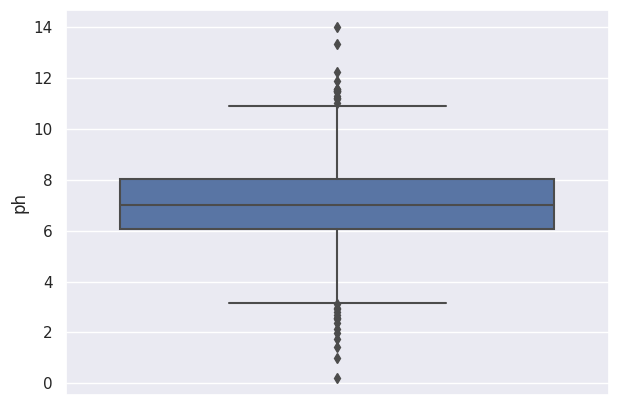

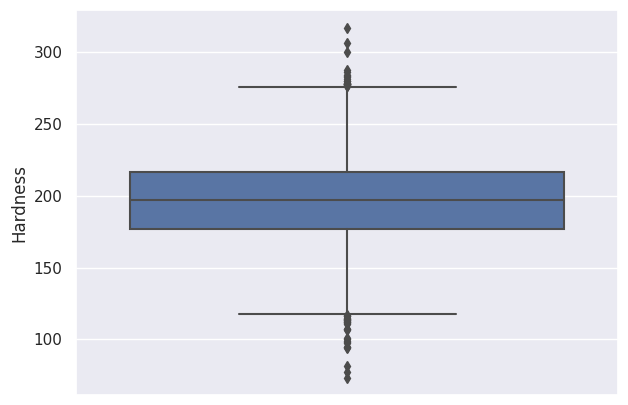

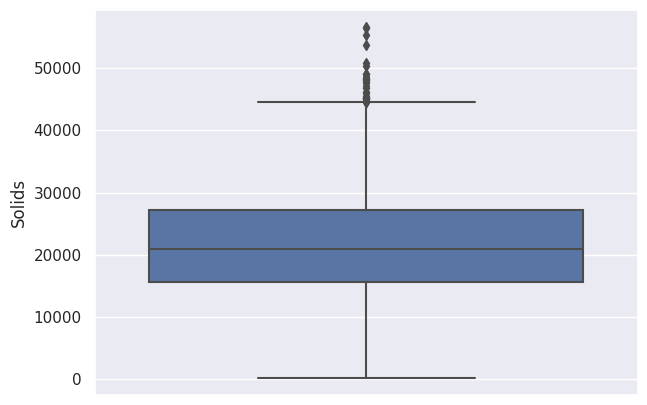

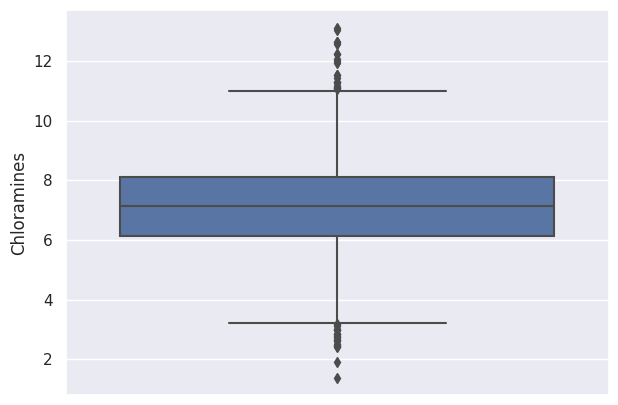

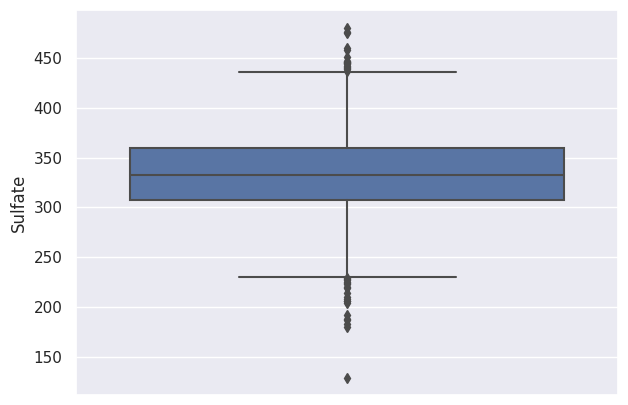

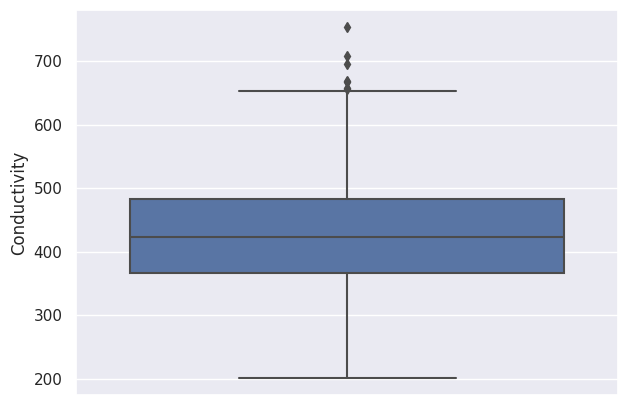

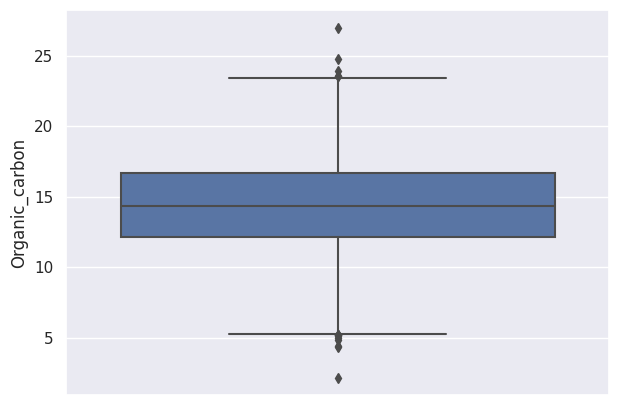

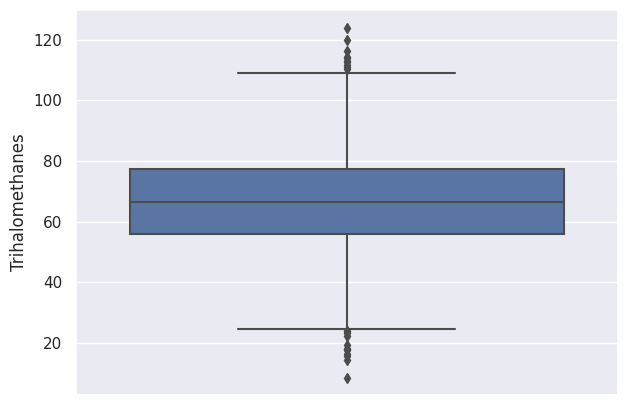

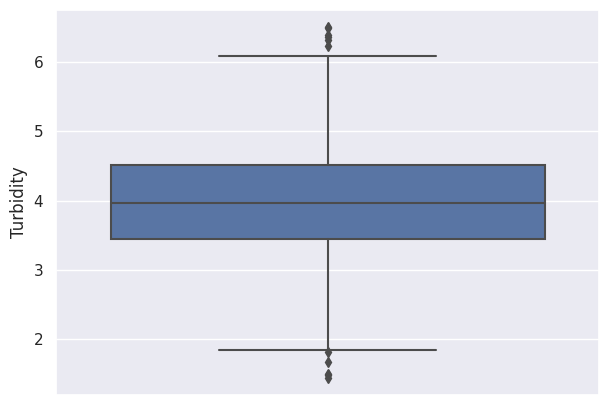

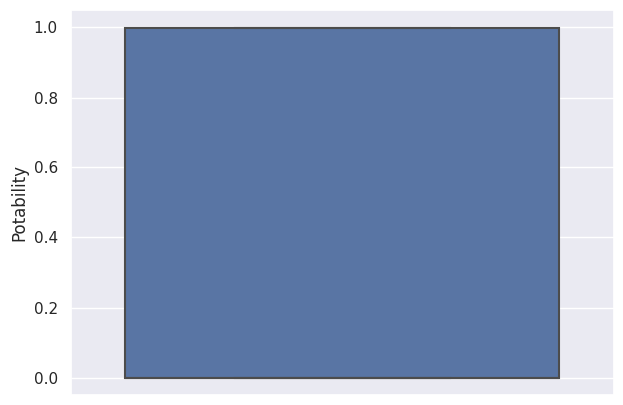

In [346]:
for column in df.columns:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = df, y = column)
    plt.show()

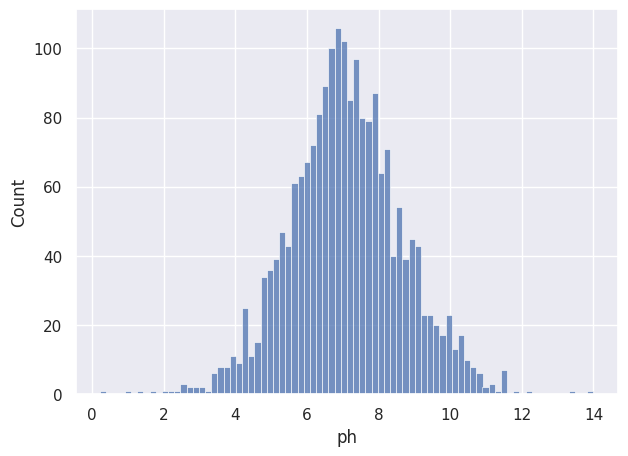

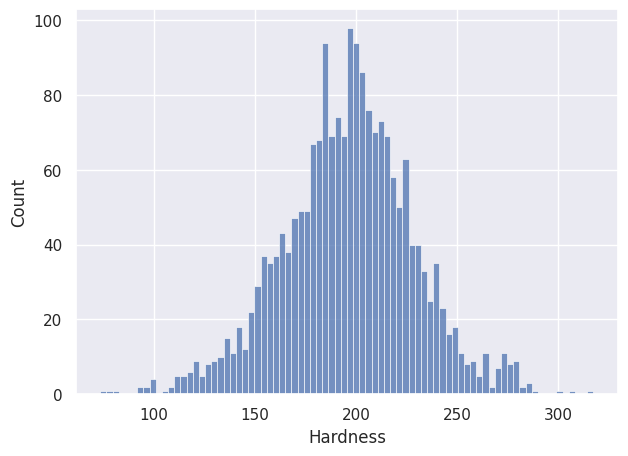

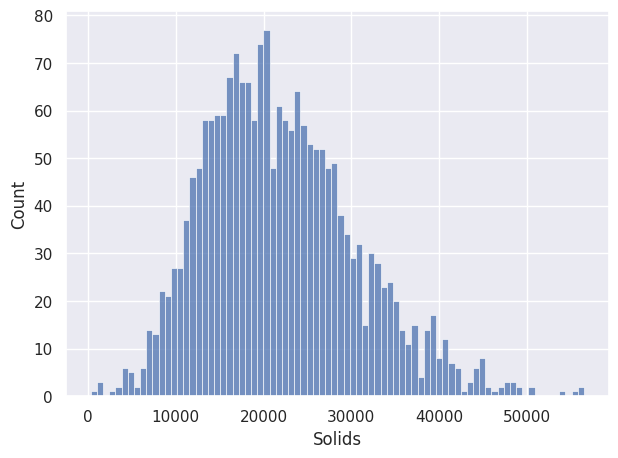

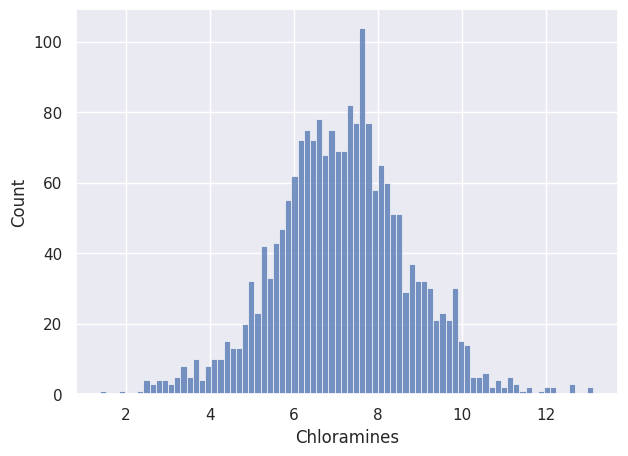

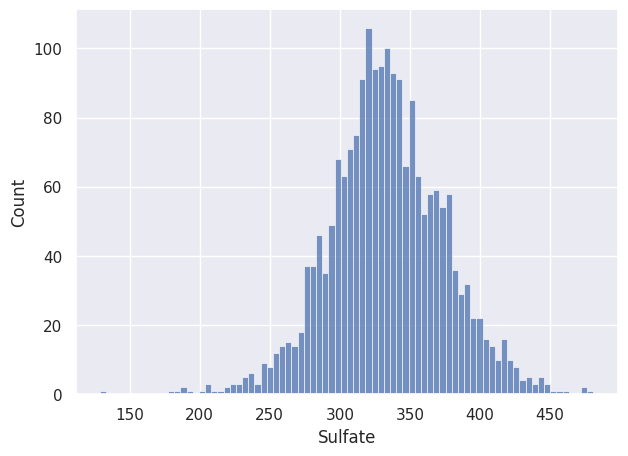

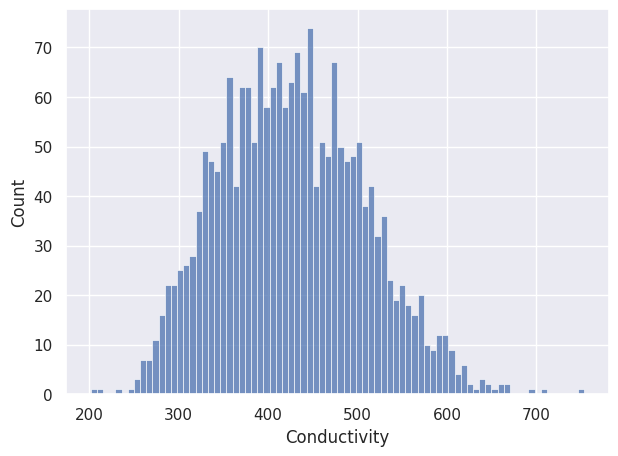

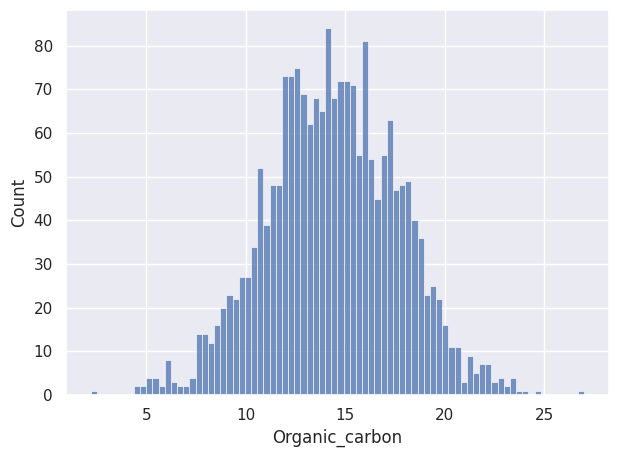

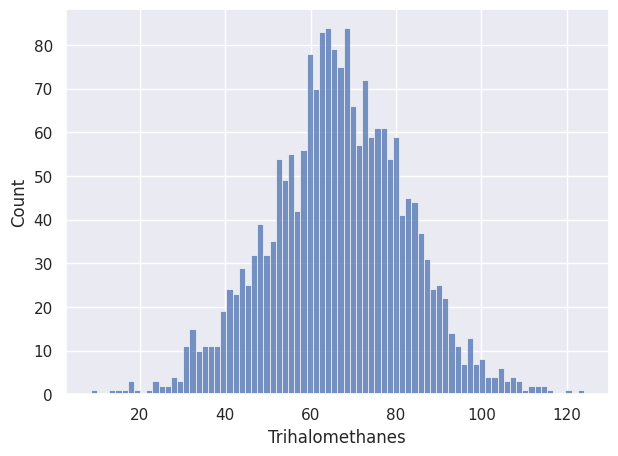

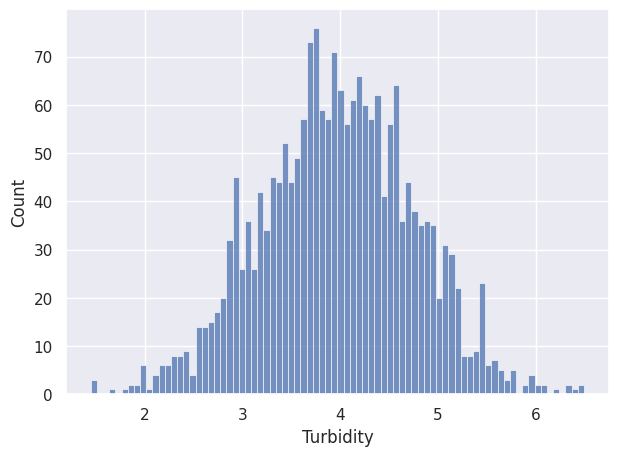

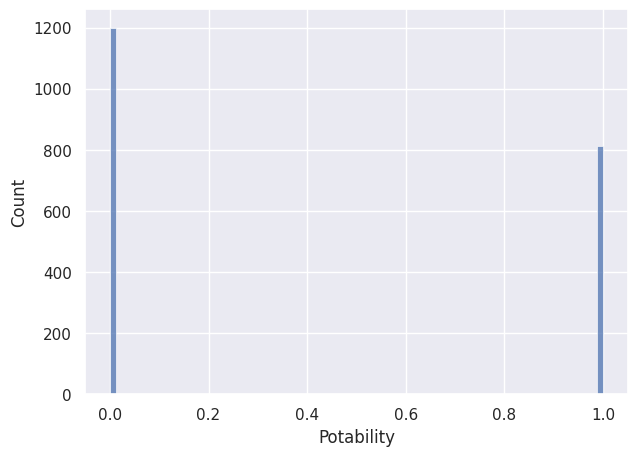

In [347]:
for column in df.columns:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = df, x = column, bins = 80)
    plt.show()

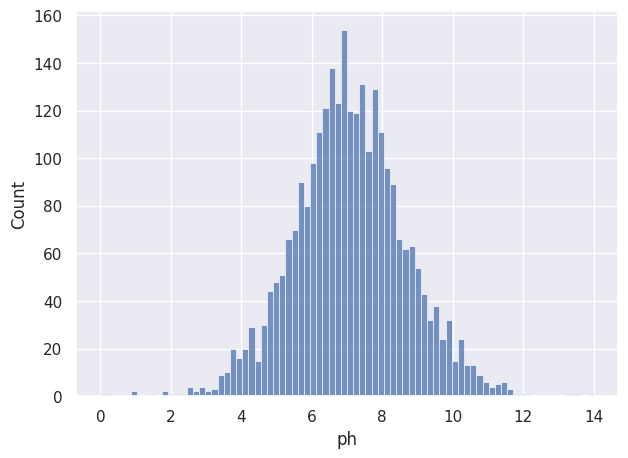

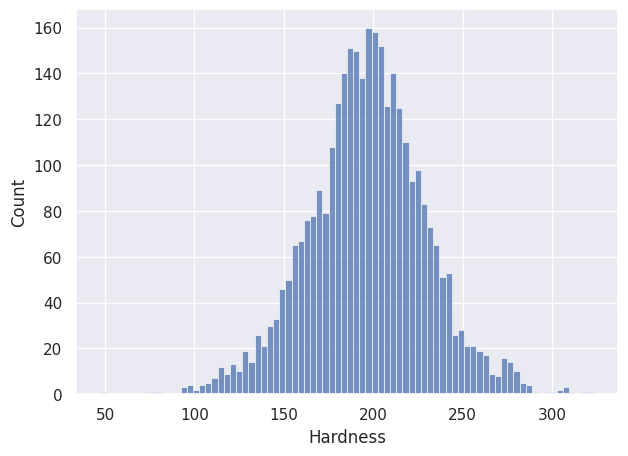

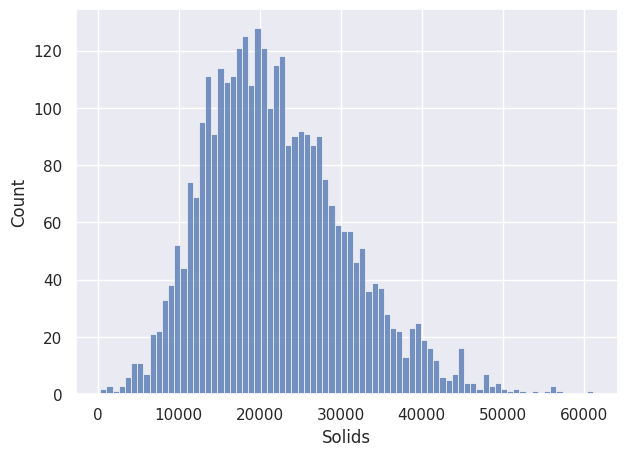

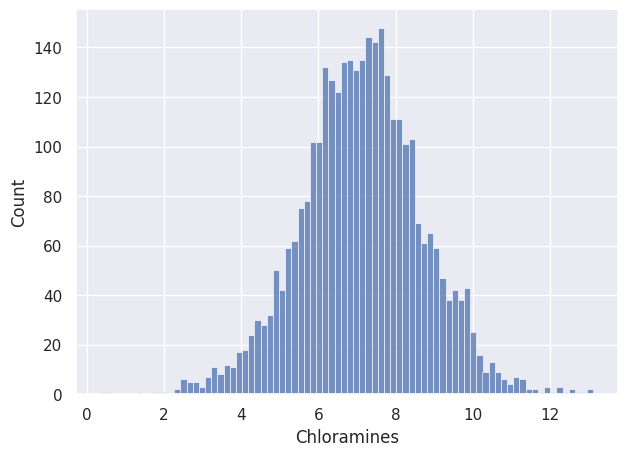

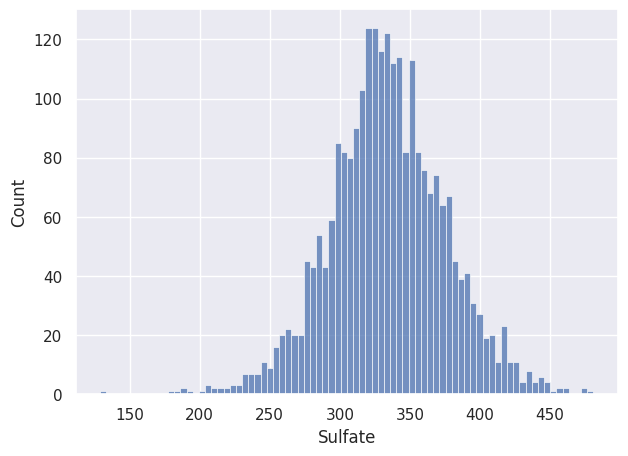

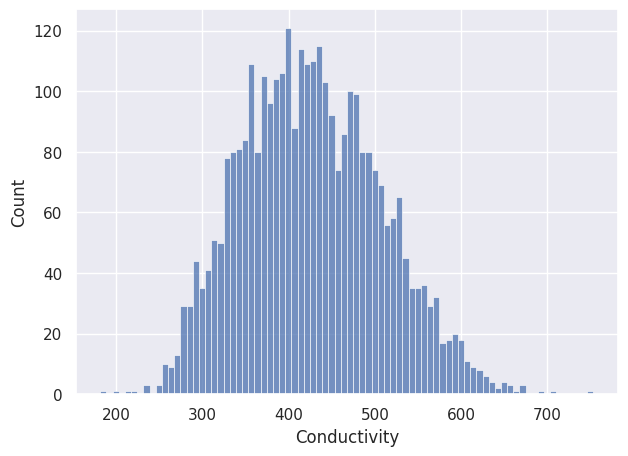

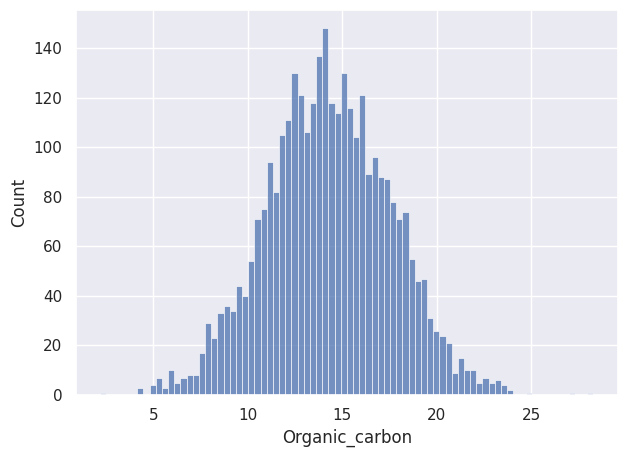

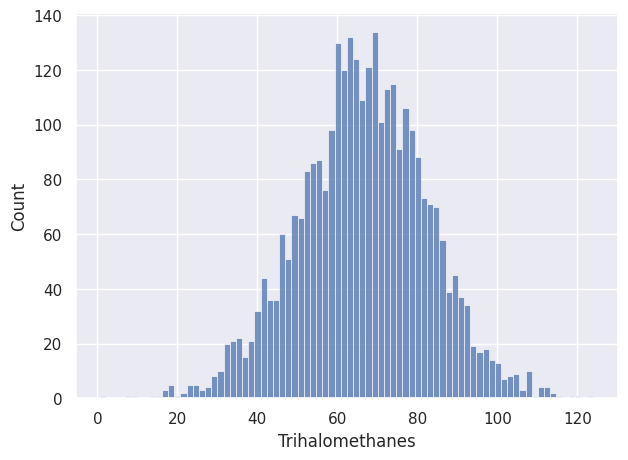

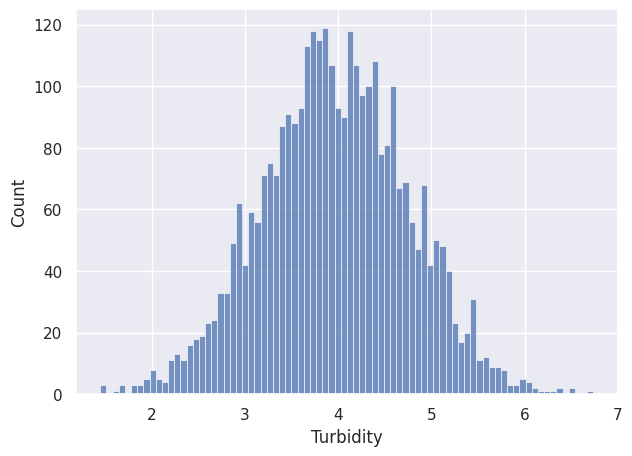

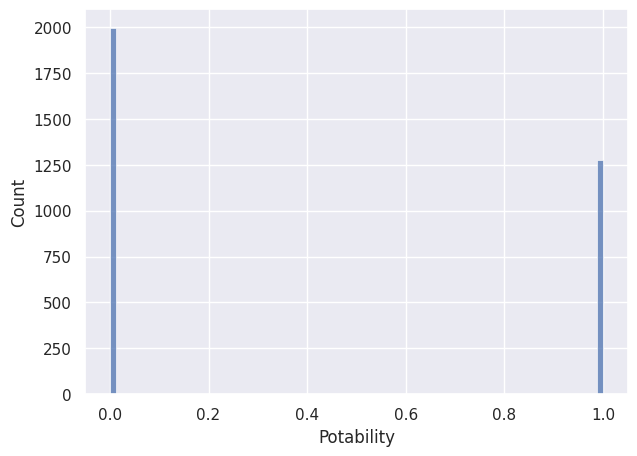

In [348]:
for column in df_copy:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = df_copy, x = column, bins = 80)
    plt.show()

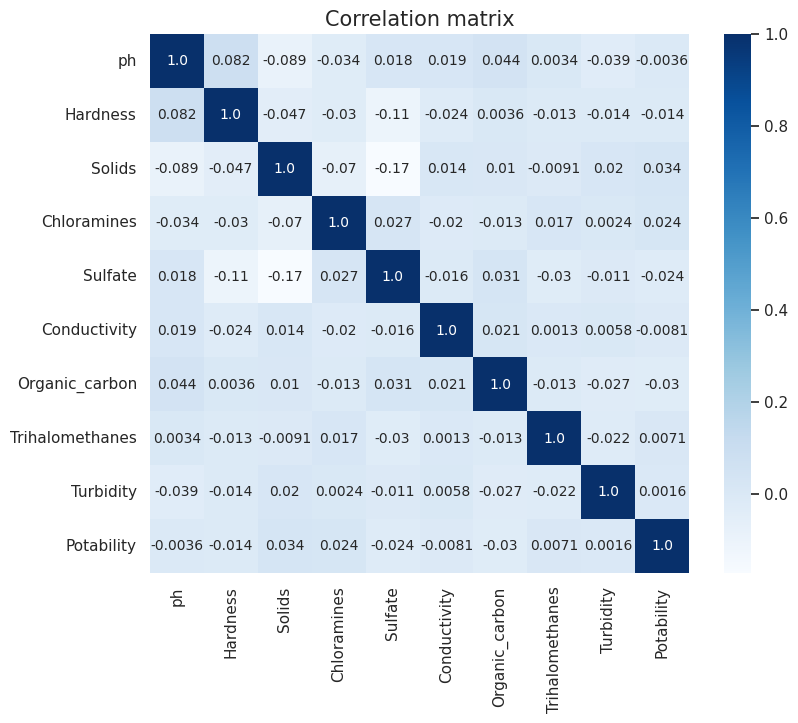

In [349]:
plt.figure(figsize = (9, 7))
sns.heatmap(df_copy.corr(), annot = True, square = True, cbar = True, annot_kws = {'size': 10}, fmt = '.2', cmap = 'Blues')
plt.title('Correlation matrix', fontsize = 15)
plt.show()

In [350]:
df_copy2 = df_copy.copy()

In [351]:
imputer2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')

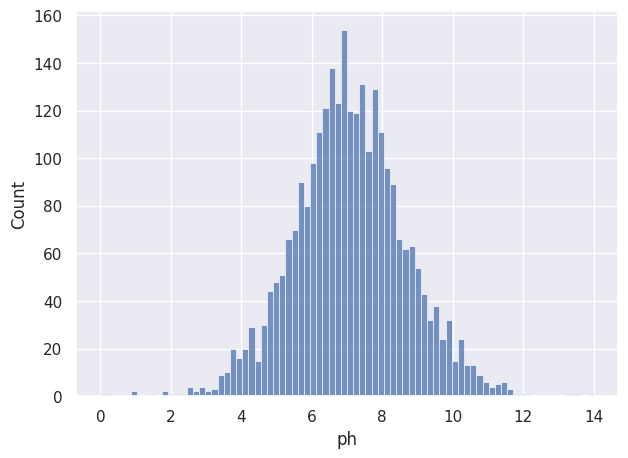

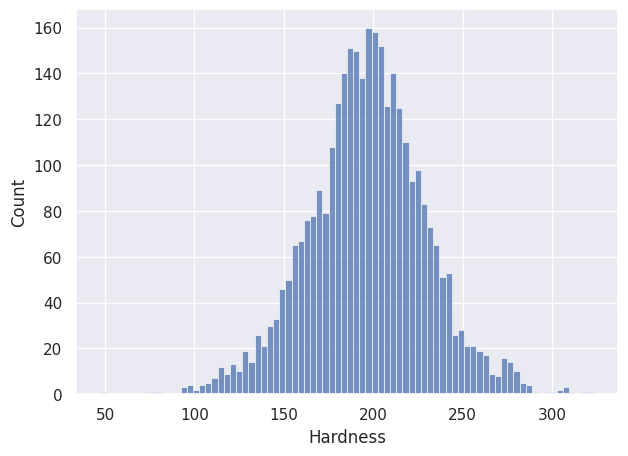

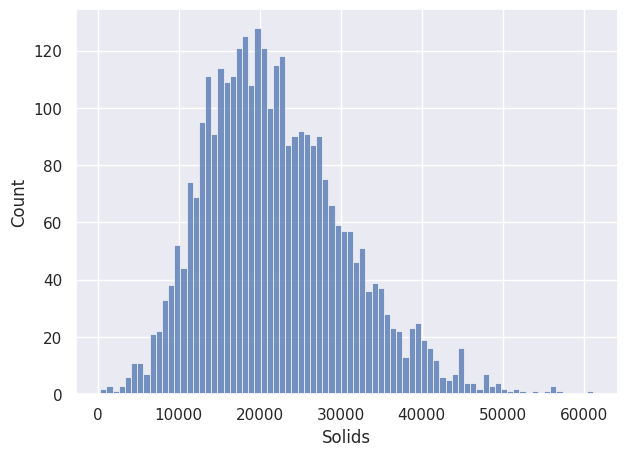

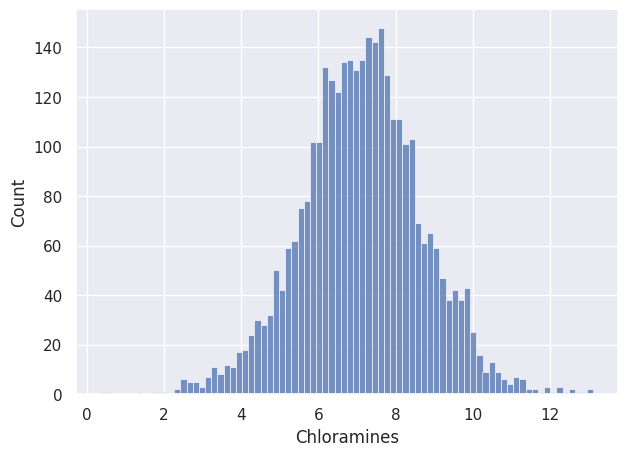

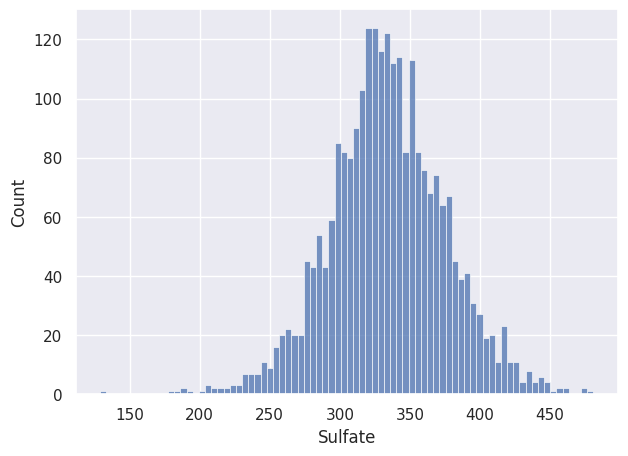

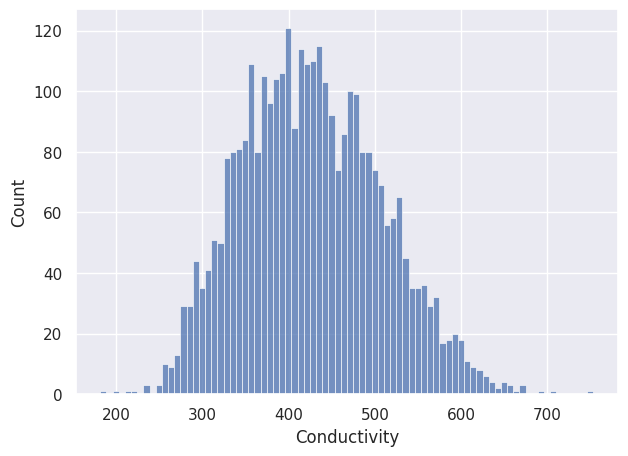

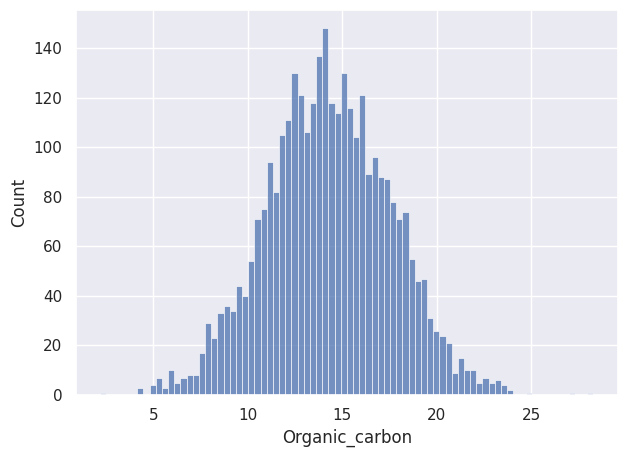

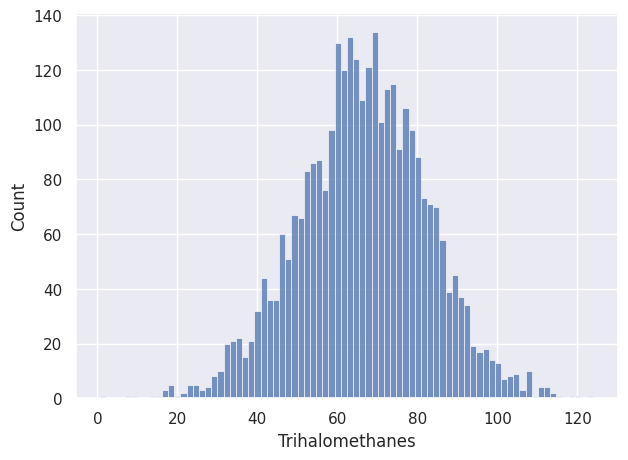

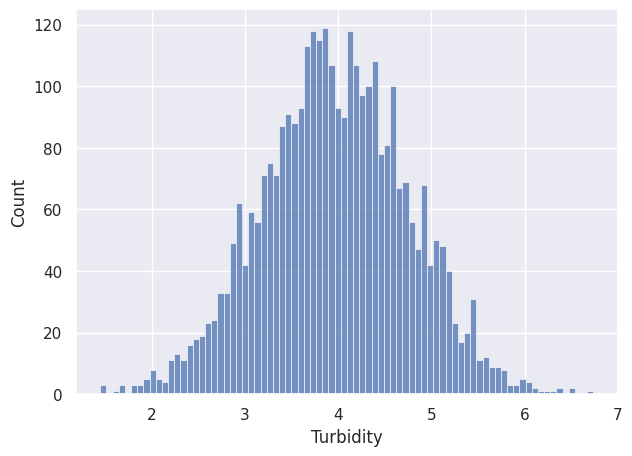

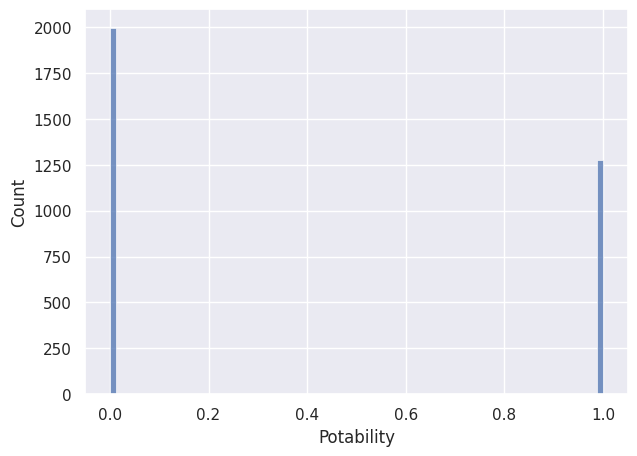

In [352]:
for column in df_copy.columns:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = df_copy, x = column, bins = 80)
    plt.show()

In [353]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [354]:
def remove_outlier(data, column_list):
    for column in column_list:
        q1 = data[column].quantile(0.99)
        q2 = data[column].quantile(0.01)
        data = data[data[column] < q1]
        data = data[data[column] > q2]
    return data

In [355]:
df2 = remove_outlier(df, df.columns)

In [356]:
df.shape

(2011, 10)

In [357]:
q1 = df['ph'].quantile(0.99)
q2 = df['ph'].quantile(0.01)
df = df[df['ph'] < q1]
df = df[df['ph'] > q2]

In [358]:
df.shape

(1969, 10)

In [359]:
def plotting(data, column):
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = data, y = column)
    plt.show()
    plt.figure(figsize = (7, 5))
    sns.histplot(data = data, x = column, bins = 80)
    plt.show()

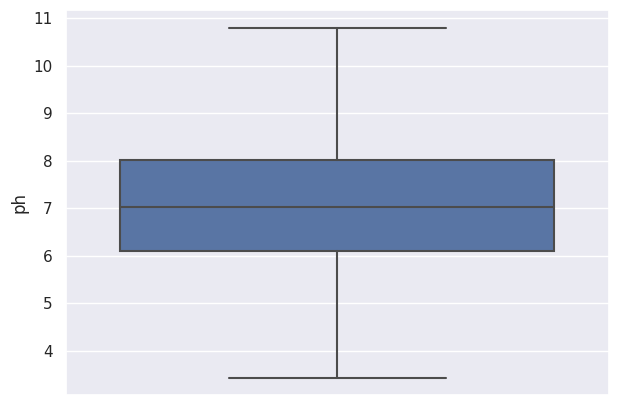

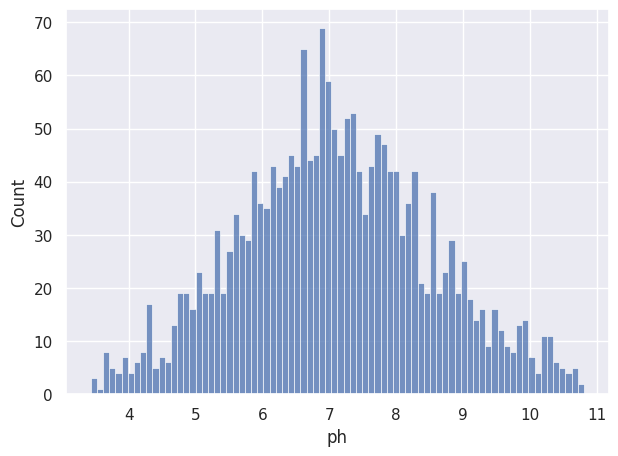

In [360]:
plotting(df, 'ph')

In [361]:
df[df['ph'] > 10].shape

(54, 10)

In [362]:
df = df[df['ph'] < 10]

In [363]:
df[df['ph'] < 4.2].shape

(39, 10)

In [364]:
df = df[df['ph'] > 4.2]

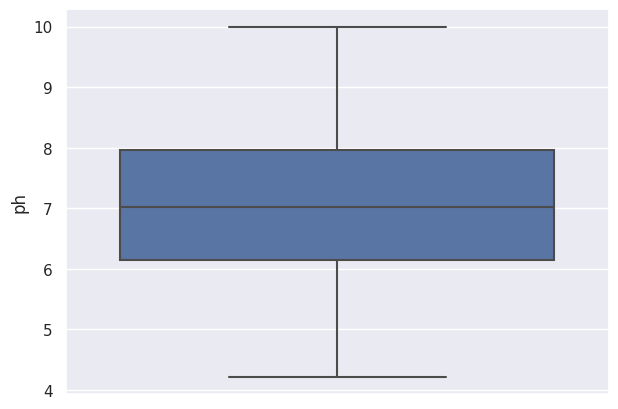

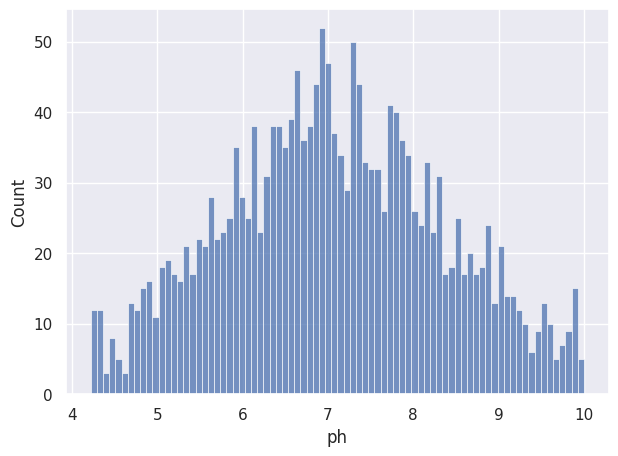

In [365]:
plotting(df, 'ph')

In [366]:
q1 = df['Hardness'].quantile(0.99)
q2 = df['Hardness'].quantile(0.01)
df = df[df['Hardness'] < q1]
df = df[df['Hardness'] > q2]

In [367]:
df.shape

(1838, 10)

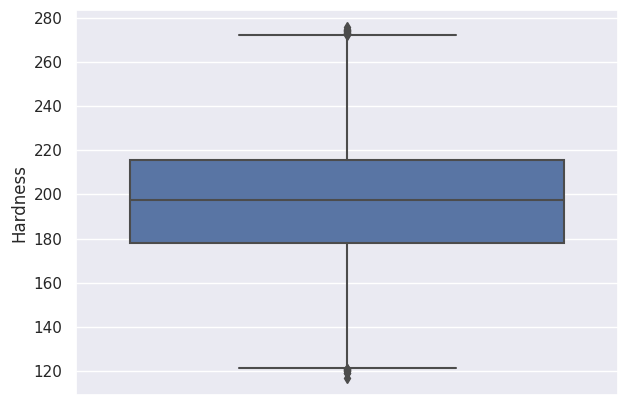

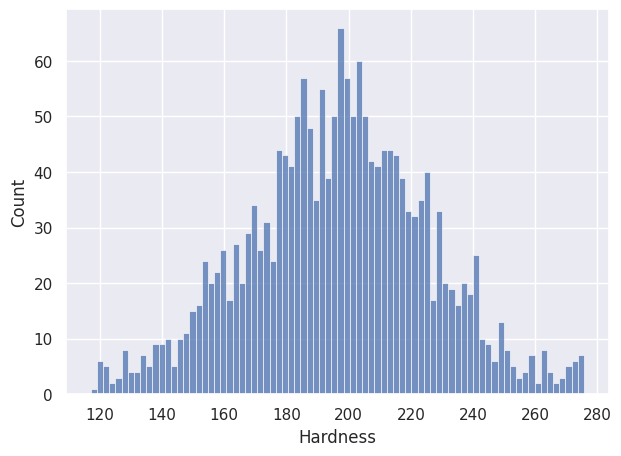

In [368]:
plotting(df, 'Hardness')

In [369]:
df[df['Hardness'] > 272].shape

(12, 10)

In [370]:
df = df[df['Hardness'] < 272]

In [371]:
df[df['Hardness'] < 122].shape

(11, 10)

In [372]:
df = df[df['Hardness'] > 122]

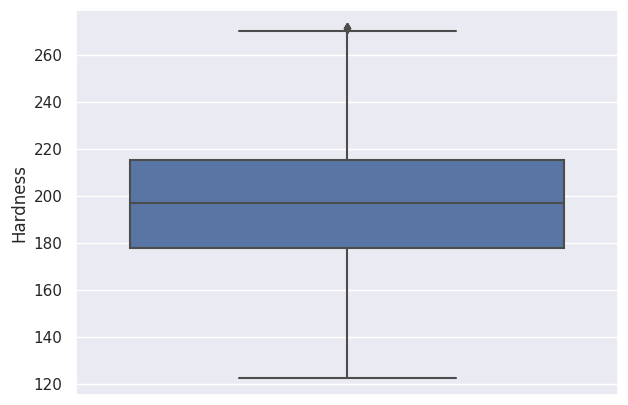

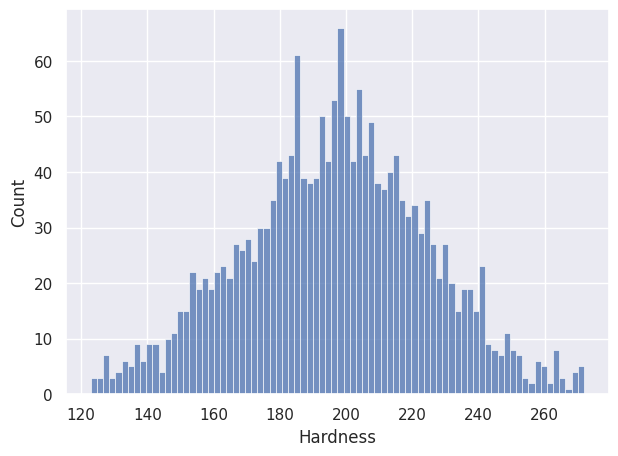

In [373]:
plotting(df, 'Hardness')

In [374]:
q1 = df['Solids'].quantile(0.99)
q2 = df['Solids'].quantile(0.01)
df = df[df['Solids'] < q1]
df = df[df['Solids'] > q2]

In [375]:
df.shape

(1777, 10)

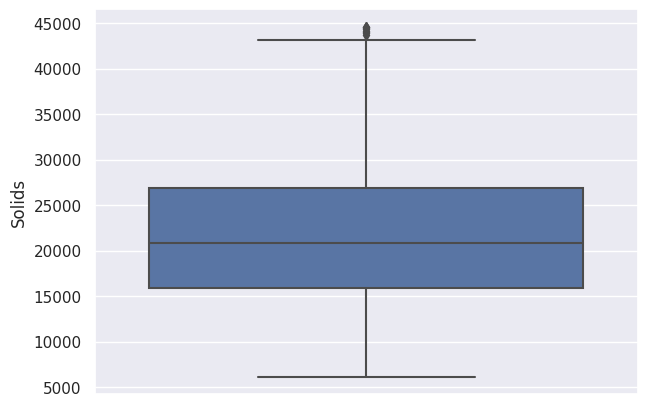

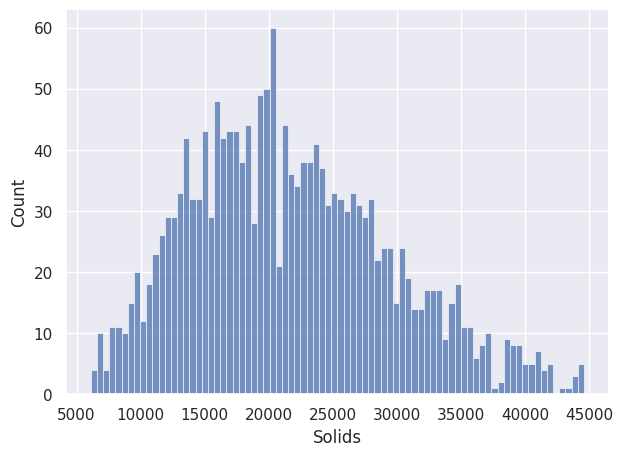

In [376]:
plotting(df, 'Solids')

In [377]:
df[df['Solids'] > 43000].shape

(10, 10)

In [378]:
df = df[df['Solids'] < 43000]

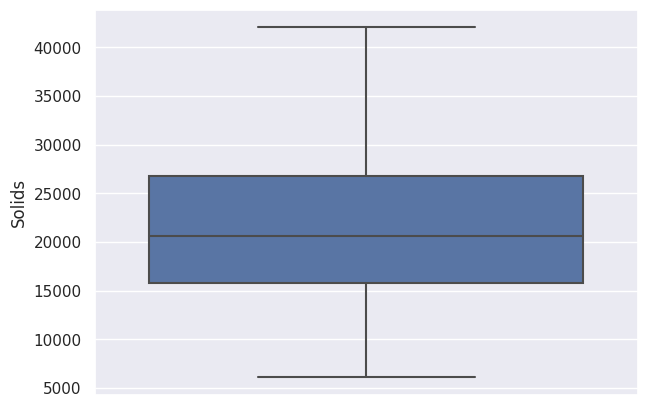

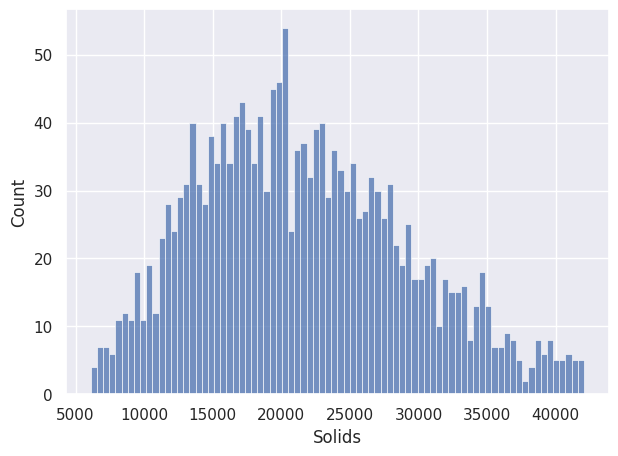

In [379]:
plotting(df, 'Solids')

In [380]:
q1 = df['Chloramines'].quantile(0.99)
q2 = df['Chloramines'].quantile(0.01)
df = df[df['Chloramines'] < q1]
df = df[df['Chloramines'] > q2]

In [381]:
df.shape

(1731, 10)

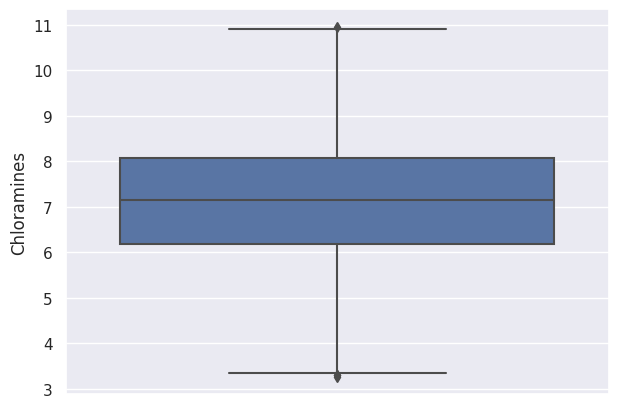

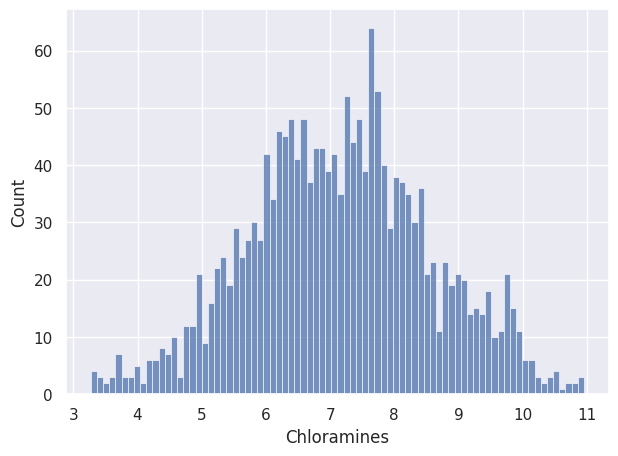

In [382]:
plotting(df, 'Chloramines')

In [383]:
q1 = df['Sulfate'].quantile(0.99)
q2 = df['Sulfate'].quantile(0.01)
df = df[df['Sulfate'] < q1]
df = df[df['Sulfate'] > q2]

In [384]:
df.shape

(1695, 10)

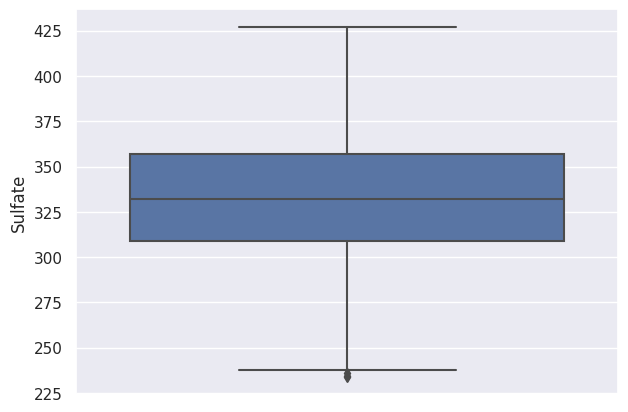

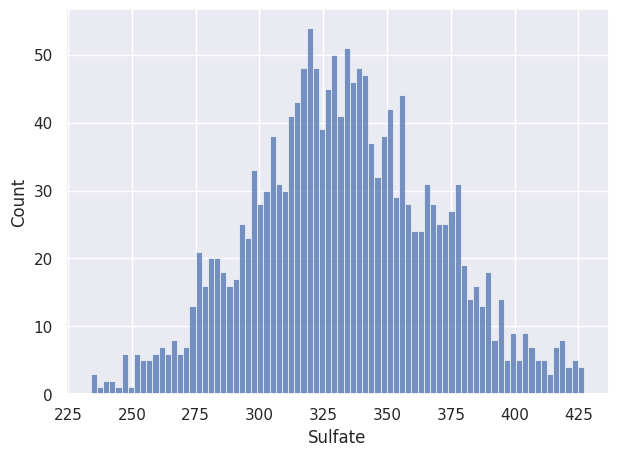

In [385]:
plotting(df, 'Sulfate')

In [386]:
df[df['Sulfate'] > 395].shape

(81, 10)

In [387]:
df = df[df['Sulfate'] < 395]

In [388]:
df[df['Sulfate'] < 273].shape

(73, 10)

In [389]:
df = df[df['Sulfate'] > 273]

In [390]:
df.shape

(1541, 10)

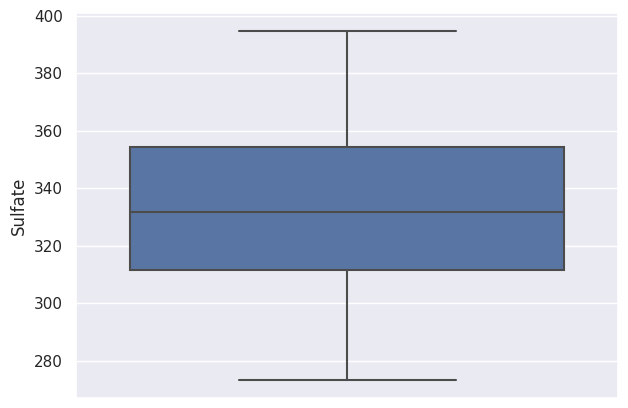

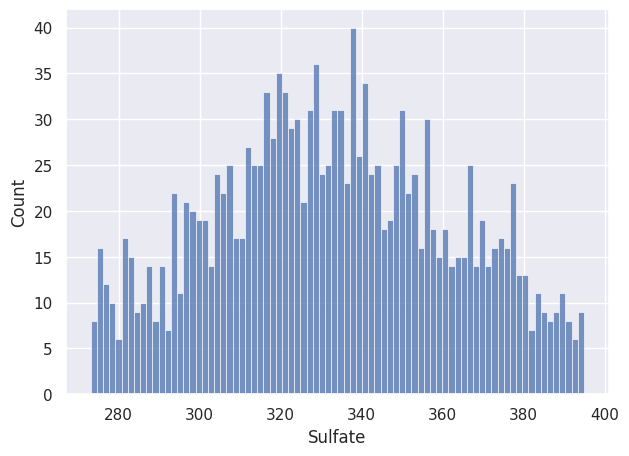

In [391]:
plotting(df, 'Sulfate')

In [392]:
df = df[df['Sulfate']< 384]

In [393]:
df = df[df['Sulfate'] > 281]

In [394]:
df.shape

(1424, 10)

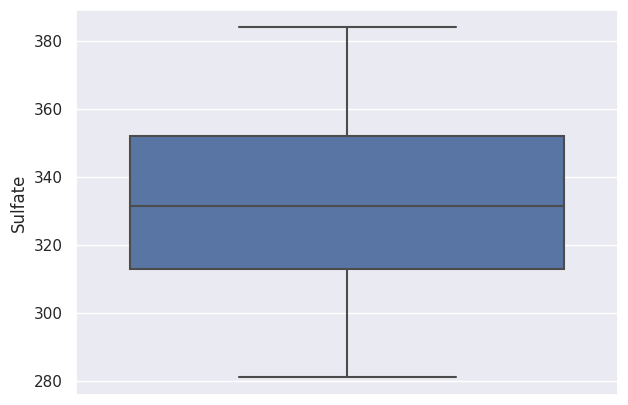

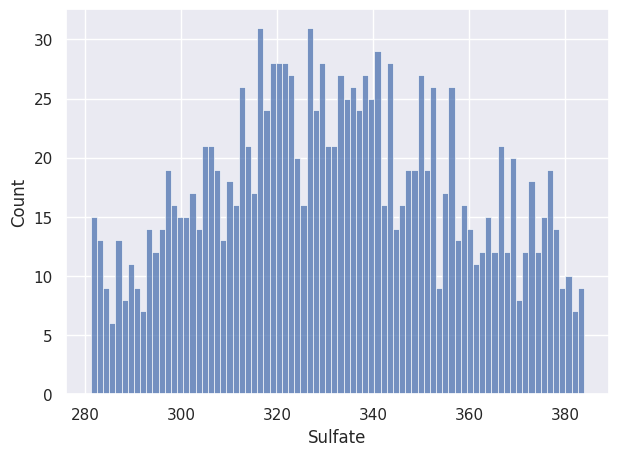

In [395]:
plotting(df, 'Sulfate')

In [396]:
df = df[df['Sulfate'] < 378]

In [397]:
df = df[df['Sulfate'] > 287]

In [398]:
df.shape

(1330, 10)

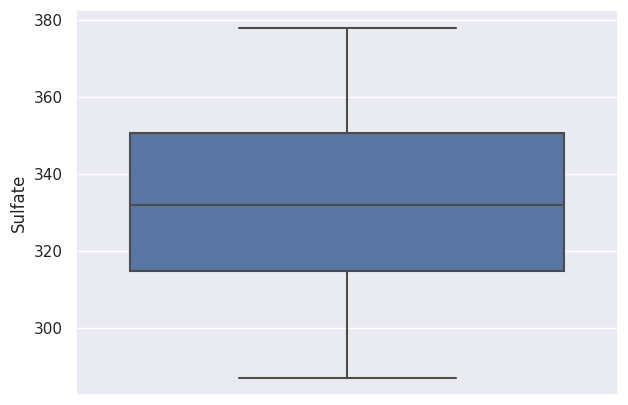

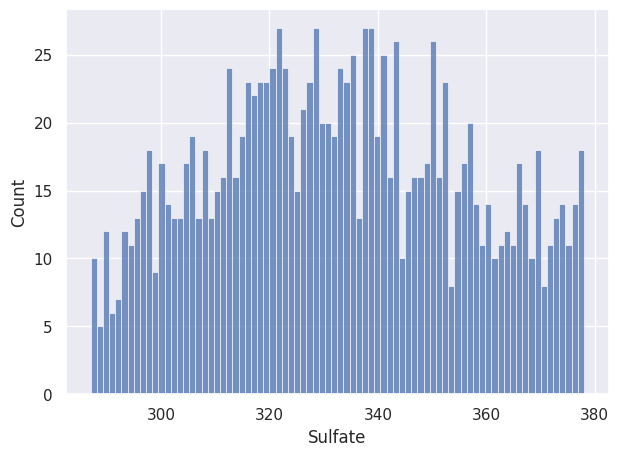

In [399]:
plotting(df, 'Sulfate')

In [400]:
q1 = df['Conductivity'].quantile(0.99)
q2 = df['Conductivity'].quantile(0.01)
df = df[df['Conductivity'] < q1]
df = df[df['Conductivity'] > q2]

In [401]:
df.shape

(1302, 10)

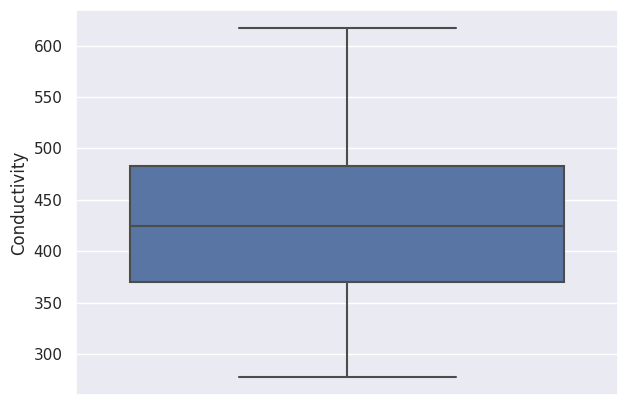

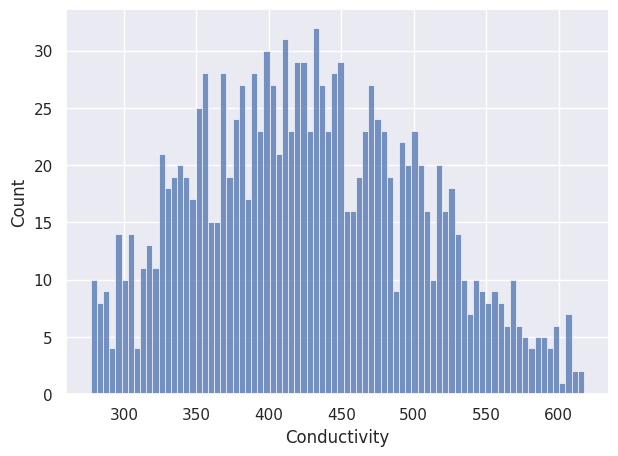

In [402]:
plotting(df, 'Conductivity')

In [403]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [404]:
q1 = df['Organic_carbon'].quantile(0.99)
q2 = df['Organic_carbon'].quantile(0.01)
df = df[df['Organic_carbon'] < q1]
df = df[df['Organic_carbon'] > q2]

In [405]:
df.shape

(1274, 10)

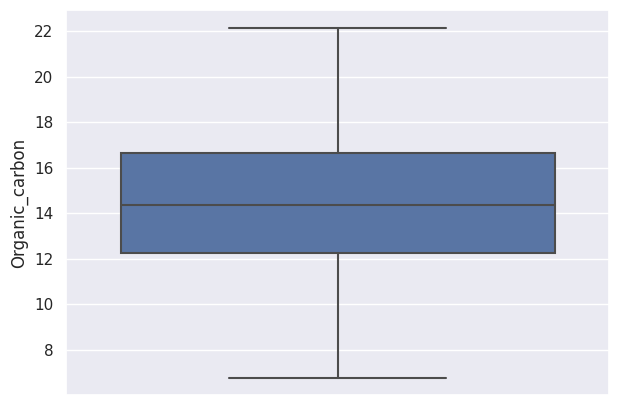

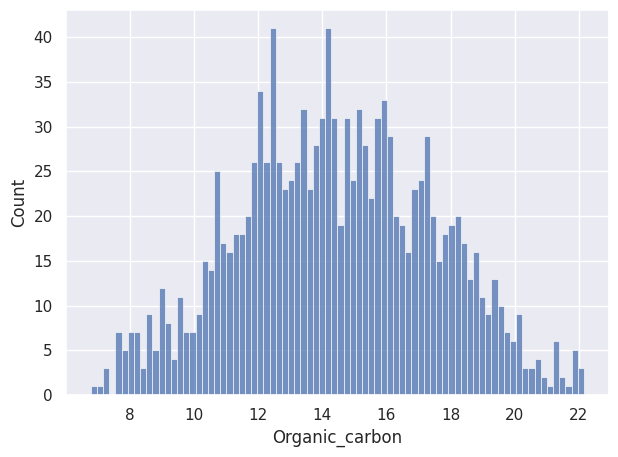

In [406]:
plotting(df, 'Organic_carbon')

In [407]:
q1 = df['Trihalomethanes'].quantile(0.99)
q2 = df['Trihalomethanes'].quantile(0.01)
df = df[df['Trihalomethanes'] < q1]
df = df[df['Trihalomethanes'] > q2]

In [408]:
df.shape

(1248, 10)

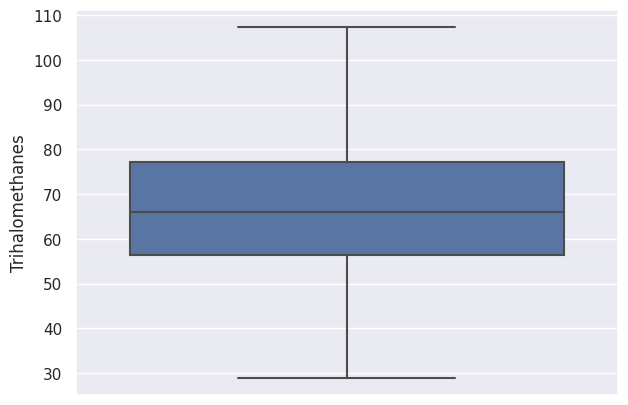

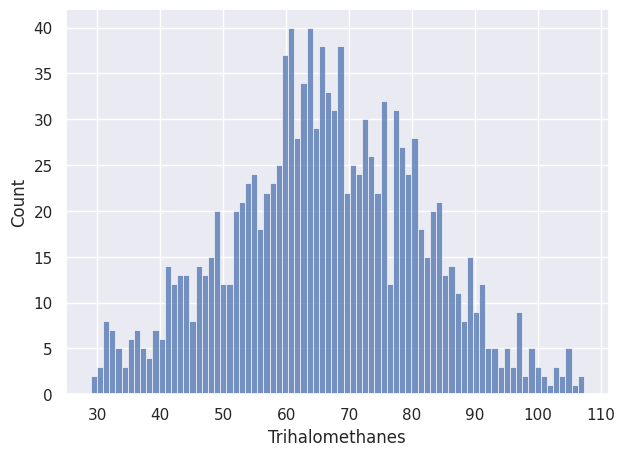

In [409]:
plotting(df, 'Trihalomethanes')

In [410]:
q1 = df['Turbidity'].quantile(0.99)
q2 = df['Turbidity'].quantile(0.01)
df = df[df['Turbidity'] < q1]
df = df[df['Turbidity'] > q2]

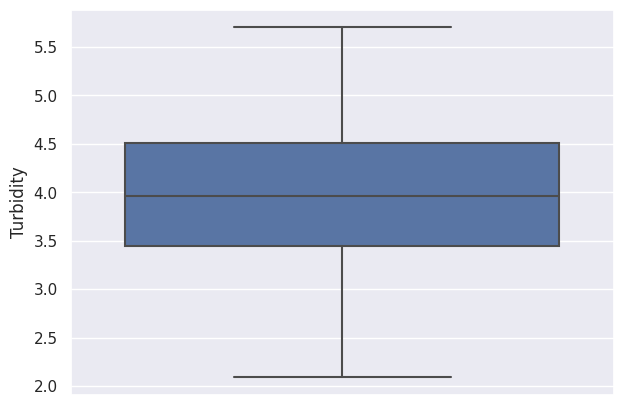

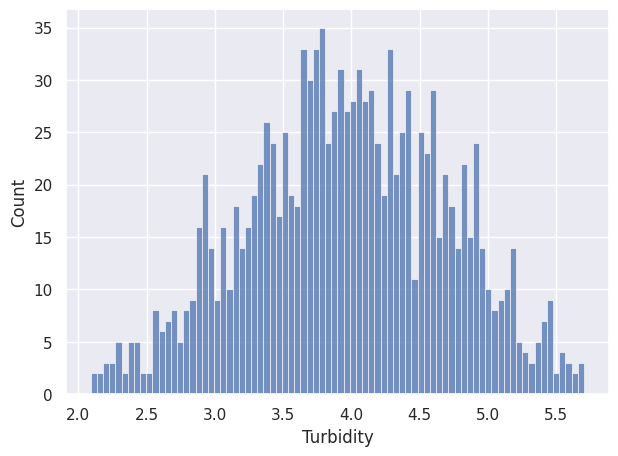

In [411]:
plotting(df, 'Turbidity')

In [412]:
df.shape

(1222, 10)

In [414]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0


In [415]:
df['Potability'].value_counts()

Potability
0    778
1    444
Name: count, dtype: int64

In [416]:
df_1 = df[df['Potability'] == 1]
df_2 = df[df['Potability'] == 0].sample(df_1.shape[0])

In [417]:
df1 = pd.concat([df_1, df_2])

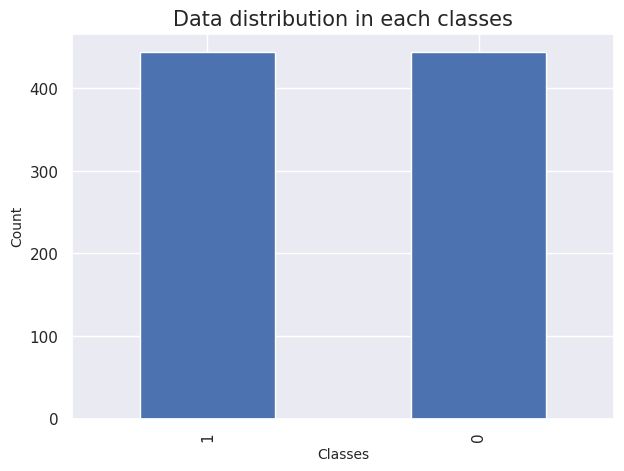

In [418]:
df1['Potability'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution in each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

In [419]:
df1.shape

(888, 10)

In [420]:
X1 = df1.drop(columns = ['Potability'], axis = 1)
y1 = df1['Potability']

In [421]:
X2 = df.drop(columns = ['Potability'], axis = 1)
y2 = df['Potability']

In [422]:
smote = SMOTE(sampling_strategy = 'not majority')

In [423]:
X_s, y_s = smote.fit_resample(X2, y2)

In [424]:
X_s.shape

(1556, 9)

In [425]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 101, shuffle = True, stratify = y1)

In [426]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_s, y_s, test_size = 0.2, random_state = 101, shuffle = True, stratify = y_s)

In [431]:
model = DecisionTreeClassifier()

In [432]:
param_grid = {'max_depth': [2, 4, 6, 10, 14, 16, 20], 'min_samples_leaf': [1, 4, 7,10, 13, 17], 'max_features': ['sqrt', 'log2']}

In [433]:
grid1 = GridSearchCV(model, param_grid = param_grid, cv = 5)

In [434]:
grid1.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 10, 14, 16, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 7, 10, 13, 17]})

In [435]:
grid1.best_params_

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4}

In [436]:
grid1.best_score_

0.5845070422535211

In [437]:
param_grid2 = {'max_depth': [2, 4, 6, 10, 14, 16, 20, 24, 28], 'min_samples_leaf': [1, 4, 7,10, 13, 17], 'max_features': ['sqrt', 'log2']}

In [438]:
grid2 = GridSearchCV(model, param_grid = param_grid2, cv = 5)

In [439]:
grid2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 10, 14, 16, 20, 24, 28],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 7, 10, 13, 17]})

In [440]:
grid2.best_params_

{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1}

In [441]:
grid2.best_score_

0.6141145226065553

In [442]:
df1 = df[df['Potability'] == 0]
df2 = df[df['Potability'] == 1]

In [443]:
df11 = df1.sample(df2.shape[0])

In [444]:
df11.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
591,6.475885,177.294949,16532.828822,10.096588,305.248945,466.649420,6.776146,65.146490,4.306113,0
1701,6.054607,228.198027,10215.812417,5.983974,306.796862,441.498500,17.229149,65.340213,4.889163,0
2471,7.575758,203.884373,20855.272321,8.109312,334.027420,532.311188,14.236013,74.638706,3.176433,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
2927,8.288765,211.452744,11234.041471,6.385510,360.843311,525.088611,15.098571,62.999999,3.580523,0


In [445]:
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
256,8.322987,207.252462,28049.646283,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1


In [446]:
df_n = pd.concat([df11, df2])

In [447]:
df_n.shape

(888, 10)

In [448]:
X = df_n.drop(columns = ['Potability'], axis = 1)
y = df_n['Potability']

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True, stratify = y)

In [450]:
df_s = pd.concat([X_train, y_train], axis = 1)

In [451]:
df_s.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2919,6.898932,209.636422,15422.220893,6.884918,293.562020,396.811214,15.671717,66.597336,3.688456,0
427,9.879071,208.905645,14673.670669,6.240248,366.817639,442.337486,19.626022,66.816581,4.218831,0
702,6.436444,192.995665,19579.389546,7.640874,314.922739,379.675367,12.897049,75.839132,3.415851,1
2799,8.264091,216.551887,23556.934353,5.830685,333.500538,450.857491,8.667720,39.804179,3.410511,1
460,7.179864,180.854211,10859.553752,8.263503,341.302486,358.056264,12.065317,83.329918,3.878447,0


In [452]:
df_s.shape

(710, 10)

In [453]:
df_s1 = df_s[df_s['Potability'] == 0]
df_s2 = df_s[df_s['Potability'] == 1]

In [454]:
df_s1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2919,6.898932,209.636422,15422.220893,6.884918,293.562020,396.811214,15.671717,66.597336,3.688456,0
427,9.879071,208.905645,14673.670669,6.240248,366.817639,442.337486,19.626022,66.816581,4.218831,0
460,7.179864,180.854211,10859.553752,8.263503,341.302486,358.056264,12.065317,83.329918,3.878447,0
500,6.109073,191.755571,26853.949493,9.064613,312.201984,375.547362,15.514033,73.789683,4.881101,0
24,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0


In [455]:
df_s2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
702,6.436444,192.995665,19579.389546,7.640874,314.922739,379.675367,12.897049,75.839132,3.415851,1
2799,8.264091,216.551887,23556.934353,5.830685,333.500538,450.857491,8.667720,39.804179,3.410511,1
1951,6.967697,177.055890,22886.965735,6.430935,315.282902,507.790062,15.288038,35.767601,4.819637,1
763,9.663653,233.487268,13213.578254,10.149937,293.074657,326.777803,10.439619,62.455373,4.741944,1
2413,7.753936,220.098279,17169.584382,7.984039,344.121899,385.045003,16.848512,47.003322,4.833027,1


In [456]:
df_s11 = df_s1.sample(3000, replace = True)
df_s22 = df_s2.sample(3000, replace = True)

In [457]:
df_m = pd.concat([df_s11, df_s22])

In [458]:
X = df_m.drop(columns = ['Potability'], axis = 1)
y = df_m['Potability']

In [459]:
df2.shape

(444, 10)

In [460]:
df1_n = df1.sample(3000, replace = True)
df2_n = df2.sample(3000, replace = True)

In [461]:
df1_n.shape

(3000, 10)

In [462]:
df2_n.shape

(3000, 10)

In [463]:
df3 = pd.concat([df1_n, df2_n])

In [464]:
df3.shape

(6000, 10)

In [465]:
X = df3.drop(columns = ['Potability'], axis = 1)
y = df3['Potability']

In [466]:
X_s, y_s = shuffle(X, y)

In [467]:
param_grid3 = {'max_depth': [2, 4, 6, 10, 14, 20, 24, 26, 28, 32, 36], 'min_samples_leaf': [1, 4, 7,10, 13, 17], 'max_features': ['sqrt', 'log2']}

In [468]:
grid3 = GridSearchCV(model, param_grid = param_grid3, cv = 5)

In [469]:
grid3.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 10, 14, 20, 24, 26, 28, 32, 36],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 7, 10, 13, 17]})

In [470]:
grid3.best_params_

{'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 1}

In [471]:
grid3.best_score_

0.993

In [472]:
print('The validation accuracy with', len(X_train1), 'training samples is:', grid1.best_score_)
print('The validation accuracy with', len(X_train2), 'training samples is:', grid2.best_score_)
print('The validation accuracy with', len(X), 'training sample is:', grid3.best_score_)

The validation accuracy with 710 training samples is: 0.5845070422535211
The validation accuracy with 1244 training samples is: 0.6141145226065553
The validation accuracy with 6000 training sample is: 0.993


In [473]:
y_pred1 = grid1.predict(X_test1)

In [474]:
y_pred2 = grid2.predict(X_test2)

In [475]:
y_pred3 = grid3.predict(X_test)

In [476]:
print('The test accuracy with', len(X_train1), 'training samples is:', accuracy_score(y_test1, y_pred1))
print('The test accuracy with', len(X_train2), 'training samples is:', accuracy_score(y_test2, y_pred2))
print('The test accuracy with', len(X), 'training samples is:', accuracy_score(y_test, y_pred3))

The test accuracy with 710 training samples is: 0.5786516853932584
The test accuracy with 1244 training samples is: 0.5833333333333334
The test accuracy with 6000 training samples is: 1.0


In [495]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        89

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



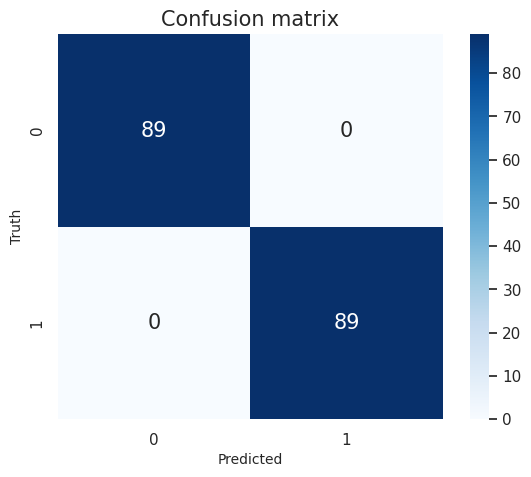

In [496]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()